# Pacotes

In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.linear_model import LinearRegression as Lr
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib as jb

In [31]:
df = pd.read_csv('df_meta.csv')

# Validação

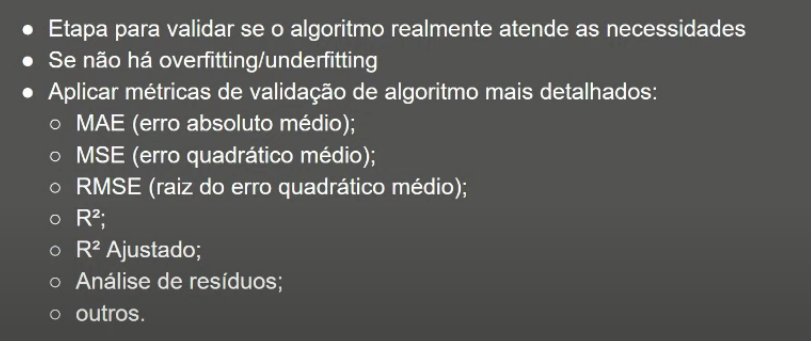

In [32]:
# Uma possível validação da regressão é avaliar a distância do ponto previsto com os dados que se tem.
# Com base nisso podemos avaliar o erro do modelo.
# Todas as técnicas de validação acima fazem isso, só que de forma diferente.
# No nosso caso utilizaremos o r^2 pois é o mais simples de ser avaliado.
# O r^2 (não é o coeficiente de pearson)
# retorna um valor entre 0 e 1. Quão mais perto de 1 mais correlacionado as variáveis estão.

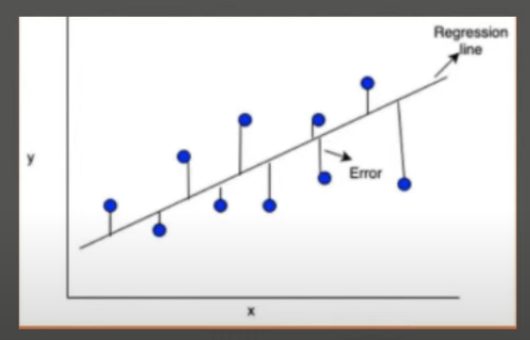

In [33]:
# Precisamos agora escolher as variáveis

# Modelo Machine Learning

## Definindo Base Treino e Teste

In [34]:
drop_colunas_x = ['id','valor_limpo','valor_limpo_log','manual','álcool','híbrido','gásnatural',
                 'elétrico','semi-automático']

dados_modelo = df.copy()

x = dados_modelo.drop(columns = drop_colunas_x+['km_log','ano_log'])
y = dados_modelo.valor_limpo

x_log = dados_modelo.drop(columns = drop_colunas_x+['km','ano'])
y_log = dados_modelo.valor_limpo_log

x_treino, x_teste, y_treino,y_teste = train_test_split(x,y,test_size=.2,random_state=1234)

x_treino_log, x_teste_log,y_treino_log, y_teste_log = train_test_split(x_log,y_log,test_size = .2, random_state=1234) 

x_treino.columns,x_treino_log.columns

(Index(['Unnamed: 0', 'ano', 'km', 'automático', 'diesel', 'flex', 'gasolina'], dtype='object'),
 Index(['Unnamed: 0', 'ano_log', 'km_log', 'automático', 'diesel', 'flex',
        'gasolina'],
       dtype='object'))

## Treinando modelos

### Regressão linear

In [35]:
resultados = []

## MODELO COM DADOS VALORES ABSOLUTOS
lr = Lr()
lr.fit(x_treino,y_treino)
resultados.append(('lr',lr.score(x_teste,y_teste)))

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
lr_log = Lr()
lr_log.fit(x_treino_log,y_treino_log)
resultados.append(('lr_log',lr_log.score(x_teste_log,y_teste_log)))

### Decision tree regressor

In [36]:
## MODELO COM DADOS VALORES ABSOLUTOS
dtr = DecisionTreeRegressor()
dtr.fit(x_treino,y_treino)
resultados.append( ('dtr', dtr.score(x_teste,y_teste)) )

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
dtr_log = DecisionTreeRegressor()
dtr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('dtr_log', dtr_log.score(x_teste_log,y_teste_log)) )


### Random forest regressor

In [37]:
## MODELO COM DADOS VALORES ABSOLUTOS
rfr = RandomForestRegressor()
rfr.fit(x_treino,y_treino)
resultados.append( ('rfr', rfr.score(x_teste,y_teste)) )

## MODELO COM DADOS VALORES NORMALIZADOS COM LOG
rfr_log = RandomForestRegressor()
rfr_log.fit(x_treino_log,y_treino_log)
resultados.append( ('rfr_log', rfr_log.score(x_teste_log,y_teste_log)) ) 

# Validando modelos

0.5627518594215102 0.7840889624501413


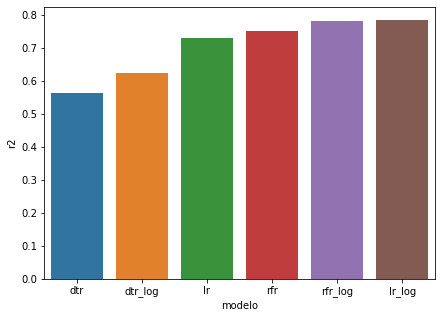

In [38]:
plt.figure(figsize=(7,5))

df_resultados = pd.DataFrame(resultados,columns=['modelo','r2'])

print(df_resultados.r2.min(),df_resultados.r2.max())

sns.barplot(x='modelo',y='r2',data= df_resultados.sort_values('r2'))
plt.show()


In [39]:
i = 150

index = range(len(x_teste_log[:i]))
pred = lr_log.predict(x_teste_log[:i])

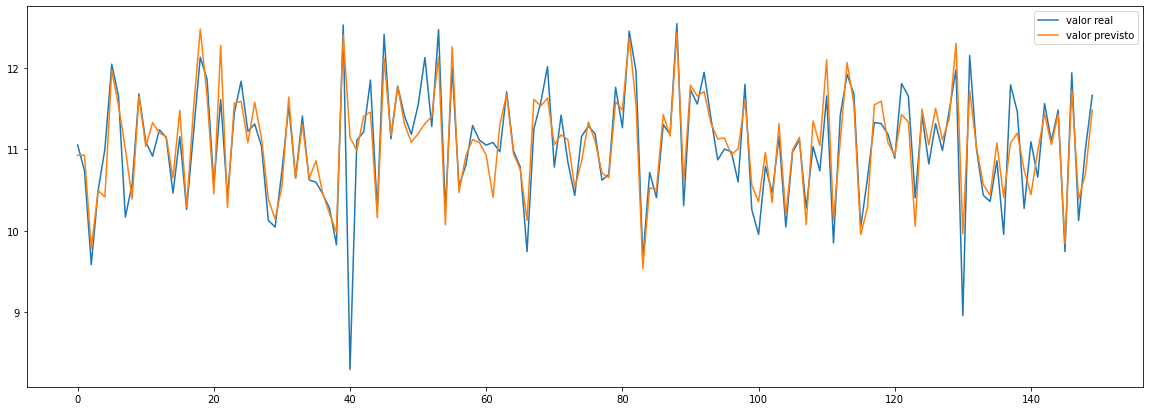

In [40]:
plt.figure(figsize=(20,7))
plt.plot(index, y_teste_log[:i],label='real')
plt.plot(index, pred, label='previsto')
plt.legend(['valor real','valor previsto'])
plt.show()

### Revertendo o log para o valor normal

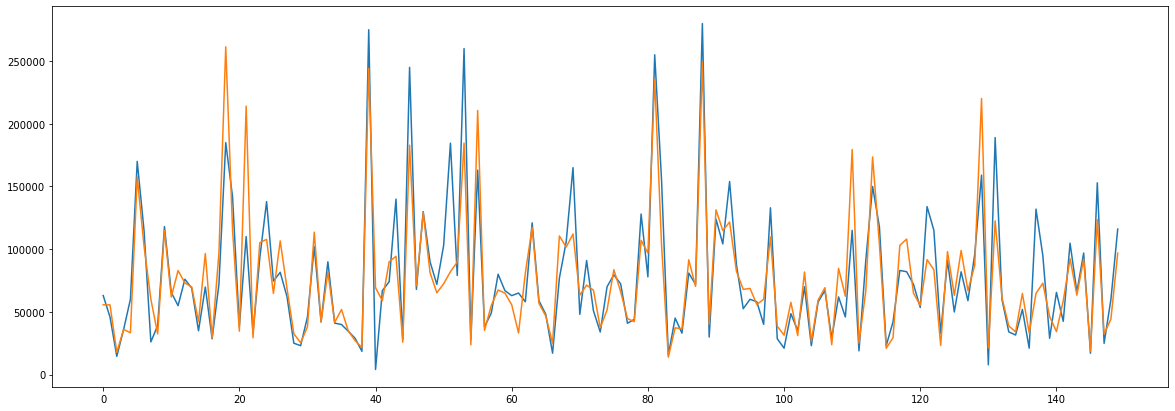

In [41]:
plt.figure(figsize=(20,7))
plt.plot(index,np.exp(y_teste_log[:i]),label='real')
plt.plot(index,np.exp(pred),label='previsto')

plt.show()

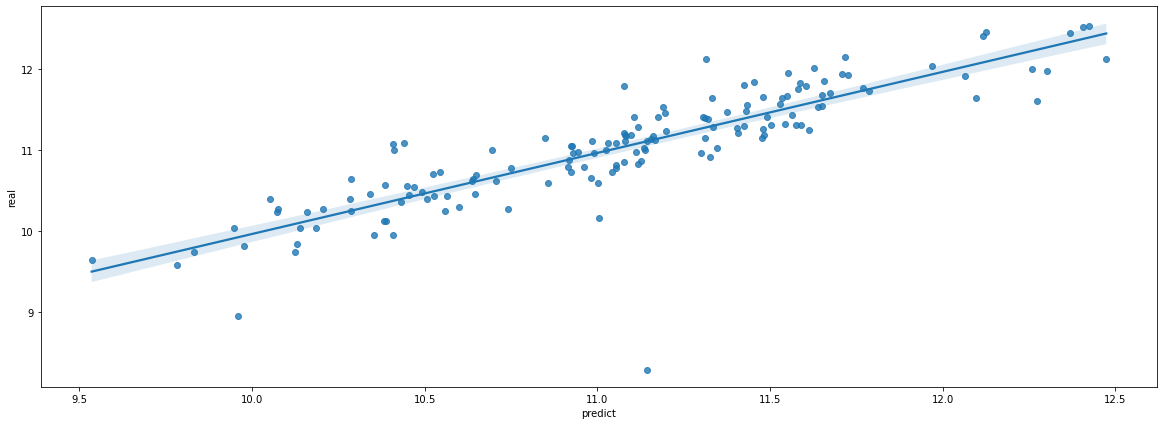

In [42]:
plt.figure(figsize=(20,7))
sns.regplot(x=pred,y=y_teste_log[:i])

plt.xlabel('predict')
plt.ylabel('real')

plt.show()

# Salvando modelo final

In [48]:
modelo_final = Lr()
modelo_final.fit(x_treino_log,y_treino_log)
modelo_final.score(x_teste_log,y_teste_log)

0.7840889624501413

In [49]:
modelo = modelo_final
description = 'Modelo de regressão linear par prever valores e automáveis. Foi utilizado a normalização\
log nas variáveis km e ano.' + " ',' ".join(x_log.columns)
date='03/06/2022'
version='0.1'
name_model='previsão_preços_automóveis'
metrics = {'r2':0.784088}

dic_save_model = dict({
    'model':modelo,
    'metadata':{
        'description':description,
        'author':'Alan F. de Souza Almeida',
        'date':date,
        'source_code_version':version,
        'metrics':metrics
    }    
})
dic_save_model

{'model': LinearRegression(),
 'metadata': {'description': "Modelo de regressão linear par prever valores e automáveis. Foi utilizado a normalizaçãolog nas variáveis km e ano.Unnamed: 0 ',' ano_log ',' km_log ',' automático ',' diesel ',' flex ',' gasolina",
  'author': 'Alan F. de Souza Almeida',
  'date': '03/06/2022',
  'source_code_version': '0.1',
  'metrics': {'r2': 0.784088}}}

In [50]:
jb.dump(dic_save_model,name_model+'.joblib')

['previsão_preços_automóveis.joblib']

In [51]:
df

,Unnamed: 0,id,ano,ano_log,valor_limpo,valor_limpo_log,km,km_log,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,0,941490102,2017.0,7.609367,56000.0,10.933107,46000.0,10.736397,0,1,0,0,0,1,0,0,0,0
1,2,1028087412,2013.0,7.607381,38000.0,10.545341,86790.0,11.371247,1,0,0,0,0,0,1,0,0,0
2,3,1028074386,2013.0,7.607381,131990.0,11.790481,89000.0,11.396392,1,0,0,1,0,0,0,0,0,0
3,4,1028074010,2007.0,7.604396,16000.0,9.680344,170000.0,12.043554,0,1,0,0,0,1,0,0,0,0
4,5,1028072683,2018.0,7.609862,54000.0,10.896739,50000.0,10.819778,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61493,97580,942127629,2018.0,7.609862,49900.0,10.817776,99000.0,11.502875,0,1,0,0,0,1,0,0,0,0
61494,97581,938971316,2011.0,7.606387,31900.0,10.370361,133290.0,11.800282,0,1,0,0,0,1,0,0,0,0
61495,97582,938027946,2011.0,7.606387,41900.0,10.643041,113460.0,11.639206,0,1,0,0,0,1,0,0,0,0
61496,97586,862284833,2011.0,7.606387,54900.0,10.913269,127000.0,11.751942,1,0,0,0,0,1,0,0,0,0
